# Lab Assignment 2
Name: **Rafiqul Islam** ; 
student id : **12123971**

### Task -1 Dimensionality Reduction, Principal Component Analysis
## a)

In [109]:
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn

import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from numpy.linalg import svd 

In [110]:
#read data form csv file using pandas
df = pd.read_csv (r'seeds.csv')
x = df.copy()
# list of column names
y = df.columns.values.tolist()
x.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [111]:
std_scaler = StandardScaler()
# scaling data by using standard scaler
x_scaled = std_scaler.fit_transform(x)
x_scaled

# manually scaling
# x_df_scaled = (x_df - x_df.mean()) / x_df.std()
# x_df_scaled.head()

array([[ 0.11716431,  0.18679667,  0.0081443 , ..., -1.00737062,
        -0.40826475, -1.22634124],
       [-0.01330197, -0.01975993,  0.44234139, ..., -1.82718718,
        -0.9454197 , -1.22634124],
       [-0.21586804, -0.38697165,  1.46979786, ..., -0.68162472,
        -1.21196249, -1.22634124],
       ...,
       [-0.59010028, -0.71593216,  0.75186803, ...,  3.14554887,
        -0.74195192,  1.23872853],
       [-1.05703224, -1.06019315, -0.80436312, ..., -0.06897709,
        -0.76636805,  1.23872853],
       [-0.89909937, -0.96073998, -0.10362921, ...,  1.32055406,
        -0.72770917,  1.23872853]])

In [112]:
#SVD part start-----------------------------------------------------------

U, S, V = svd(x_scaled, full_matrices=False)
  
print("matrix U = ")
print(U.shape)
print("matrix S = ")
print(S.shape)
print("matrix V = ")
print(V.shape)

var_explained_svd = np.round(S**2/np.sum(S**2), decimals=3)
var_explained_svd

matrix U = 
(199, 8)
matrix S = 
(8,)
matrix V = 
(8, 8)


array([0.648, 0.214, 0.085, 0.045, 0.006, 0.002, 0.001, 0.   ])

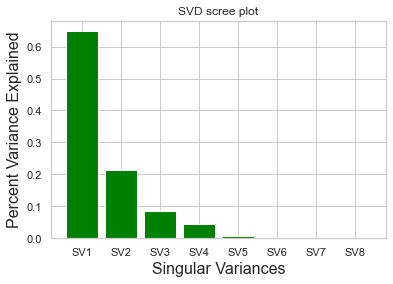

In [113]:

label2 = ['SV' + str(x) for x in range(1, len(var_explained)+1)]
plt.bar(x=list(range(1,len(var_explained)+1)), height=var_explained,
        tick_label = label2, color="green")

plt.xlabel('Singular Variances', fontsize=16)
plt.ylabel('Percent Variance Explained', fontsize=16)
plt.title('SVD scree plot')
plt.show()
# plt.savefig('svd_scree_plot.png',dpi=100)
#SVD part end-----------------------------------------------------------

In [114]:
#PCA part start-----------------------------------------------------------

pca = PCA(n_components=8)
x_pca = pca.fit_transform(x_scaled)
# pca.explained_variance_ratio_
# pca.explained_variance_ratio_.sum()
var_explained_pca = np.round(pca.explained_variance_ratio_, decimals=3)
var_explained_pca

array([0.648, 0.214, 0.085, 0.045, 0.006, 0.002, 0.001, 0.   ])

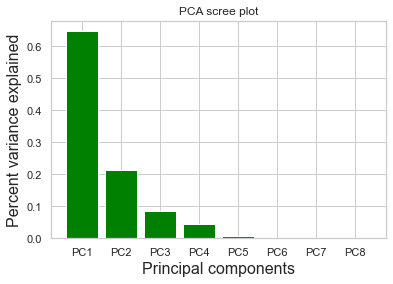

In [115]:

label = ['PC' + str(x) for x in range(1, len(var_explained_pca)+1)]
plt.bar(x=range(1, len(var_explained_pca)+1), height=var_explained_pca, 
        tick_label = label, color="green")
plt.ylabel('Percent variance explained',  fontsize=16)
plt.xlabel('Principal components',  fontsize=16)
plt.title('PCA scree plot')
plt.show()
# plt.savefig('pca_scree_plot.png',dpi=100)
#PCA part end-----------------------------------------------------------


In [116]:
# sbn.set_theme(style="whitegrid")
# tips = sbn.load_dataset("tips")
# ax = sbn.stripplot(x=var_explained_svd)
# ax = sbn.stripplot(x=var_explained_pca)

## b)

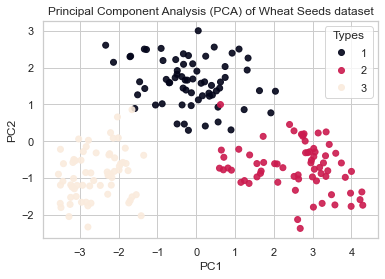

In [117]:
types = df.Type
# plt.figure(figsize = (9,5))
points = plt.scatter(x_pca[:,0], x_pca[:,1], c = types,  alpha=0.9)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Principal Component Analysis (PCA) of Wheat Seeds dataset")
plt.legend(*points.legend_elements(), title="Types")
plt.show()


## c)

### The importance of PCA in the “curse of dimensionality” problem:
'curse of dimensionality' is a major problem in data mining in large data sets with many potential predictor variables. This expression describe the increasing difficulty in training a model when more predictor variables are added to it. In other words, the error increases with the increase in the number of features. Furthermore, because of high dimentation the algorithms are harder to design.

Principal component analysis (PCA) can solve this problem. PCA is a technique for reducing the large dimensionality of datasets to a smaller one that still contain the most important information from the large set. So without lossing much information we get the lower dimensional data, lower dimensional data is make the computarions easy and faster.

### Task -2 Clustering
## a)

### Task -3 Apriori Algorithm for Recommender Systems
## a)

In [10]:
import numpy as np
import pandas as pd

In [23]:
movie_df = pd.read_fwf(r'movies.txt', header = None, usecols=[0])
movie_df[0][0]

'Incredibles 2;Avengers: Infinity War - Part I;Avengers: Infinity War - Part II;Deadpool 2'